# Persiapan data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset berasal dari kaggle: https://www.kaggle.com/datasets/gregorut/videogamesales

In [31]:
df = pd.read_csv('videogamesales/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data undestanding

In [32]:
df.shape

(16598, 11)

In [33]:
print('Jumlah judul video games:', len(df['Name'].unique()))
print('Jumlah Genre:', len(df['Genre'].unique()))

Jumlah judul video games: 11493
Jumlah Genre: 12


# Exploratory Data Analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [35]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


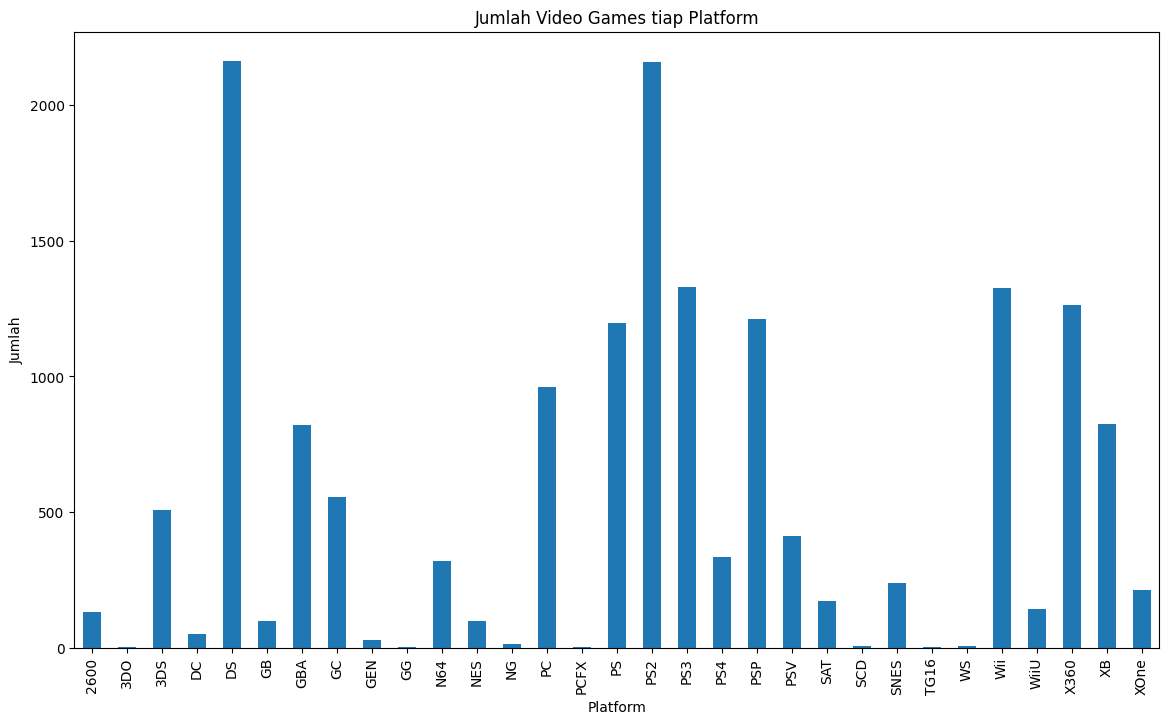

In [36]:

ax = df['Platform'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Jumlah Video Games tiap Platform")
ax.set_xlabel("Platform")
ax.set_ylabel("Jumlah")
plt.show()

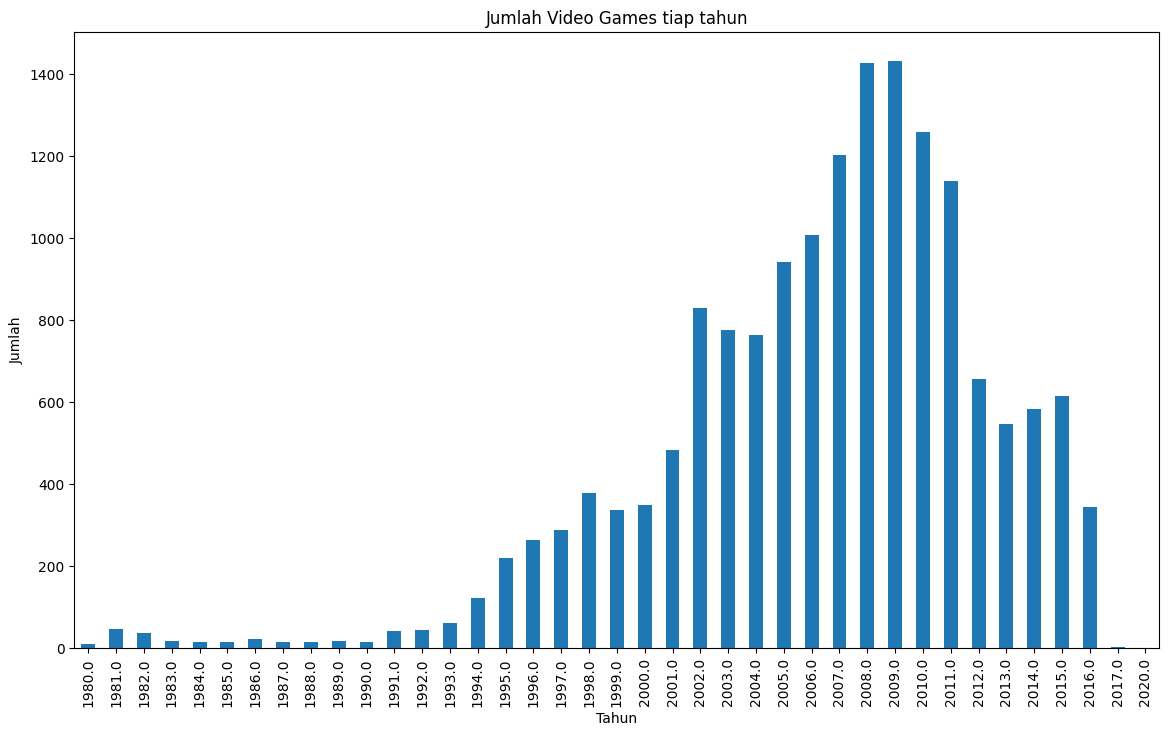

In [37]:

ax = df['Year'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Jumlah Video Games tiap tahun")
ax.set_xlabel("Tahun")
ax.set_ylabel("Jumlah")
plt.show()

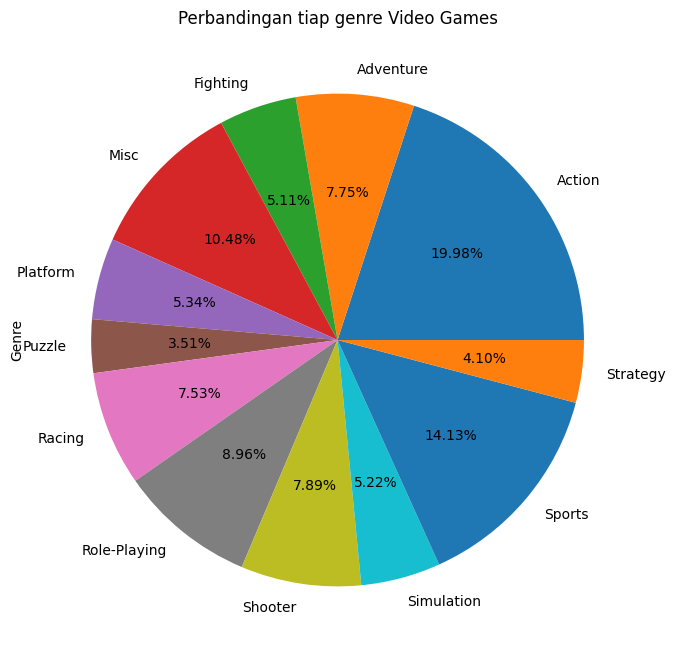

In [38]:
ax = df['Genre'].value_counts().sort_index().plot(kind='pie',
                                    figsize=(14,8),
                                    title="Perbandingan tiap genre Video Games", autopct='%.2f%%')
plt.show()

# Data Preprocessing

In [39]:
vidya = df[['Name','Genre']]
vidya

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Platform
16594,Men in Black II: Alien Escape,Shooter
16595,SCORE International Baja 1000: The Official Game,Racing
16596,Know How 2,Puzzle


Mengubah kata 'Role-Playing' menjadi 'RolePlaying' agar ketika di dilakukan TFIDF menjadi satu kata

In [40]:
vidya['Genre'] = vidya['Genre'].apply(lambda x: x.replace('-',''))
vidya

C:\Users\alo\AppData\Local\Temp\ipykernel_10504\2598494056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vidya['Genre'] = vidya['Genre'].apply(lambda x: x.replace('-',''))


,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,RolePlaying
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Platform
16594,Men in Black II: Alien Escape,Shooter
16595,SCORE International Baja 1000: The Official Game,Racing
16596,Know How 2,Puzzle


In [41]:
vidya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    16598 non-null  object
 1   Genre   16598 non-null  object
dtypes: object(2)
memory usage: 259.5+ KB


In [42]:
vidya.duplicated().sum()

5101

In [43]:
vidya = vidya.drop_duplicates(subset=['Name'])
vidya.shape

(11493, 2)

# Model and Result

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(vidya['Genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out() 

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'roleplaying', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

In [45]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(vidya['Genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(11493, 12)

In [46]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=vidya['Name']
)

,action,adventure,fighting,misc,platform,puzzle,racing,roleplaying,shooter,simulation,sports,strategy
Name,,,,,,,,,,,,
Wii Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Super Mario Bros.,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mario Kart Wii,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Wii Sports Resort,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Pokemon Red/Pokemon Blue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirube Kareru,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eiyuu Densetsu: Sora no Kiseki Material Collection Portable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Plushees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=vidya['Name'], columns=vidya['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df

Shape: (11493, 11493)


Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue,Tetris,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Duck Hunt,...,Carmageddon 64,Bust-A-Move 3000,Breach,Mezase!! Tsuri Master DS,Mega Brain Boost,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirube Kareru,Eiyuu Densetsu: Sora no Kiseki Material Collection Portable,Plushees,Woody Woodpecker in Crazy Castle 5,Know How 2
Name,,,,,,,,,,,,,,,,,,,,,
Wii Sports,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Super Mario Bros.,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Mario Kart Wii,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wii Sports Resort,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Pokemon Red/Pokemon Blue,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirube Kareru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Eiyuu Densetsu: Sora no Kiseki Material Collection Portable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Plushees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
def get_recommendations(nama, similarity_data=cosine_sim_df, items=vidya[['Name', 'Genre']], k=7):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [51]:
vidya[vidya['Name']== "NBA 2K14"]

,Name,Genre
625,NBA 2K14,Sports


In [52]:
get_recommendations("NBA 2K14",k=10)

,Name,Genre
0,NBA 09: The Inside,Sports
1,World Stadium 4,Sports
2,Kawa no Nushi Tsuri,Sports
3,Let's Ride: Sunshine Stables,Sports
4,International Superstar Soccer Deluxe,Sports
5,Jikkyou Powerful Pro Yakyuu 3 '97 Haru,Sports
6,Pro Yaky? Spirits 3,Sports
7,Wakeboarding Unleashed Featuring Shaun Murray,Sports
8,Ready 2 Rumble Revolution,Sports
9,VR Golf '97,Sports
